### 这个notebook 将会用 Titanic 和 Lead conversion (TH1) 两个dataset 来总结和归纳所需的 
### 数据cleansing
### 数据visualization
### 数据engineering
### 数据transformation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(12,10)})

In [2]:
ship = pd.read_csv('titanic_train.csv')
lead = pd.read_csv('lead_data.csv')

In [ ]:
# basic information
# feature condition: missing value, unique value, value sample
# feature datatype
# feature statistics

In [5]:
ship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [8]:
ship.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
# draw graph, visualization
ship.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# +1 feature condition: missing value, unique value, value sample

In [3]:
col = ship.columns
numerical = ['PassengerId','Age','SibSp','Fare','Parch']
categorical = []

data_basic = pd.DataFrame(index = ['Observations', 'Percent Missing', 'Category', 'Values'])

for i in col:
    obs = ship[i].size
    p_nan = round(ship[i].isna().sum()/obs, 2)
    num_nan = f'{p_nan}%({p_nan}/{obs})'
    
    dtype = 'numerical' if i in numerical else  'categorical' and categorical.append(i)
    
    value = ship[i].unique()[0:3]
    data_basic[i] = [obs, num_nan, dtype, value]
    
data_basic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Observations,891,891,891,891,891,891,891,891,891,891,891,891
Percent Missing,0.0%(0.0/891),0.0%(0.0/891),0.0%(0.0/891),0.0%(0.0/891),0.0%(0.0/891),0.2%(0.2/891),0.0%(0.0/891),0.0%(0.0/891),0.0%(0.0/891),0.0%(0.0/891),0.77%(0.77/891),0.0%(0.0/891)
Category,numerical,None,None,None,None,numerical,numerical,numerical,None,numerical,None,None
Values,"[1, 2, 3]","[0, 1]","[3, 1, 2]","[Braund, Mr. Owen Harris, Cumings, Mrs. John B...","[male, female]","[22.0, 38.0, 26.0]","[1, 0, 3]","[0, 1, 2]","[A/5 21171, PC 17599, STON/O2. 3101282]","[7.25, 71.2833, 7.925]","[nan, C85, C123]","[S, C, Q]"


In [4]:
numerical_column = ['Age','Fare', 'PassengerId']
cat_column = []

for i in ship.columns:
    if i not in numerical_column:
        cat_column.append(i)


In [5]:
# Checking unique values and null values for the categorical columns
def Cat_info(df, categorical_column):
    df_result = pd.DataFrame(columns=["columns","values","unique_values","null_values","null_percent"])
    
    df_temp=pd.DataFrame()
    for value in categorical_column:
        df_temp["columns"] = [value]
        df_temp["values"] = [df[value].unique()]
        df_temp["unique_values"] = df[value].nunique()
        df_temp["null_values"] = df[value].isna().sum()
        df_temp["null_percent"] = (df[value].isna().sum()/len(df)*100).round(1)
        df_result = df_result.append(df_temp)
    
    df_result.sort_values("null_values", ascending =False, inplace=True)
    df_result.set_index("columns", inplace=True)
    return df_result

In [6]:
Cat_info(ship, cat_column)

,values,unique_values,null_values,null_percent
columns,,,,
Cabin,"[nan, C85, C123, E46, G6, C103, D56, A6, C23 C...",147,687,77.1
Embarked,"[S, C, Q, nan]",3,2,0.2
Survived,"[0, 1]",2,0,0.0
Pclass,"[3, 1, 2]",3,0,0.0
Name,"[Braund, Mr. Owen Harris, Cumings, Mrs. John B...",891,0,0.0
Sex,"[male, female]",2,0,0.0
SibSp,"[1, 0, 3, 4, 2, 5, 8]",7,0,0.0
Parch,"[0, 1, 2, 5, 3, 4, 6]",7,0,0.0
Ticket,"[A/5 21171, PC 17599, STON/O2. 3101282, 113803...",681,0,0.0


## + 1 Feature condition visualization 

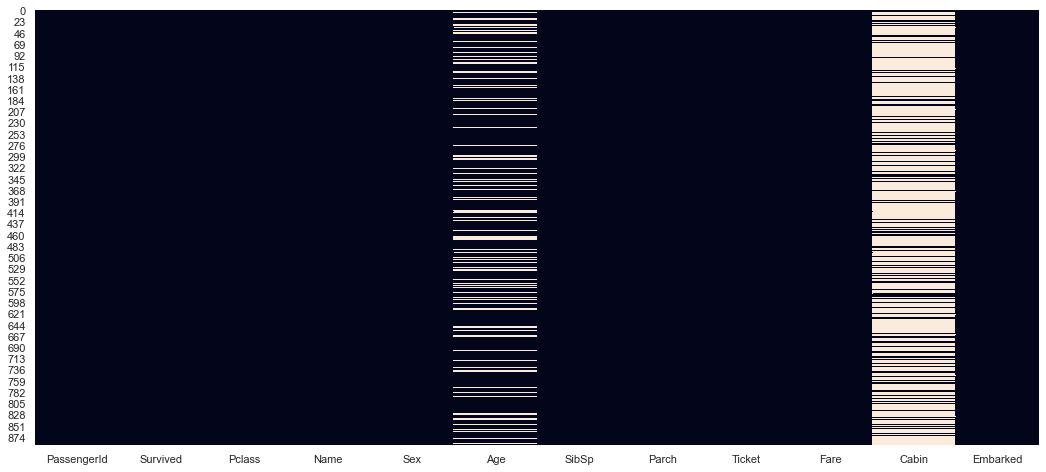

In [7]:
plt.figure(figsize = (18,8))
sns.heatmap(ship.isnull(),cbar = False)
plt.show()

In [8]:
null_perc = pd.DataFrame(round((ship.isnull().sum())*100/ship.shape[0],2)).reset_index()
null_perc.columns = ['Column Name', 'Null Values Percentage']
null_perc

null_value = pd.DataFrame(ship.isnull().sum()).reset_index()
null_value.columns = ['Column Name', 'Null Values']
null_value

null_lead = pd.merge(null_value, null_perc, on='Column Name')
null_lead.sort_values("Null Values", ascending = False)

,Column Name,Null Values,Null Values Percentage
10,Cabin,687,77.10
5,Age,177,19.87
11,Embarked,2,0.22
0,PassengerId,0,0.00
1,Survived,0,0.00
2,Pclass,0,0.00
3,Name,0,0.00
4,Sex,0,0.00
6,SibSp,0,0.00
7,Parch,0,0.00


C:\Users\jzhou\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


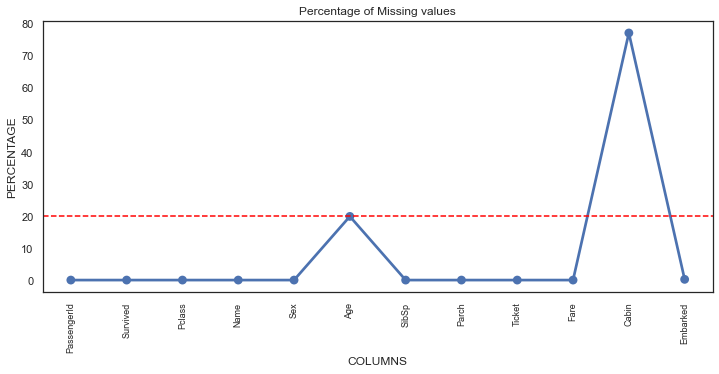

In [9]:
#plotting the null value percentage
sns.set_style("white")
fig = plt.figure(figsize=(12,5))
null_lead = pd.DataFrame((ship.isnull().sum())*100/ship.shape[0]).reset_index()
ax = sns.pointplot("index",0,data=null_lead)
plt.xticks(rotation =90,fontsize =9)
ax.axhline(20, ls='--',color='red')
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

In [353]:
# move survived column to the last 
cols = list(ship.columns.values)
idx = cols.index('Survived')
rearrange_cols = cols[:idx] + cols[idx+1:] + [cols[idx]]
rearrange_cols

df = df[rearrange_cols]

['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Title',
 'Survived']

In [358]:
ship.iloc[:,2:]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [357]:
ship.iloc[:,1]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [22]:
# index extraction
ship.iloc[:,-1]

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

## +1 Basic data understanding

In [10]:
ship.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
#Checking the detailed percentile values
ship.describe(percentiles=[.1,.5,.25,.75,.90,.95,.99])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
10%,90.000000,0.000000,1.000000,14.000000,0.000000,0.000000,7.550000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
90%,802.000000,1.000000,3.000000,50.000000,1.000000,2.000000,77.958300
95%,846.500000,1.000000,3.000000,56.000000,3.000000,2.000000,112.079150


In [12]:
# categorical destribution
ship.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hocking, Mr. Richard George",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [ ]:
# categorical variable and survival rate
# numerical variabel and survivial rate
# table look, pivot table, cross tab, group by
# multiple variable view
# graph

In [69]:
ship[['Pclass','Survived']].groupby(['Pclass']).agg({'Survived': 'sum'}).sort_values('Survived', ascending = True)

,Survived
Pclass,
2,87
3,119
1,136


In [55]:
pd.crosstab(ship['Pclass'], ship['Survived'], margins = True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [97]:
ship.pivot_table( values = 'Ticket', index = 'Pclass', columns = ['Survived','Sex'], aggfunc = 'count')

Survived      0           1     
Sex      female male female male
Pclass                          
1             3   77     91   45
2             6   91     70   17
3            72  300     72   47

In [89]:
ship.loc[(ship['Pclass'] == 1) & (ship['Sex'] == 'female')].pivot_table(values = 'Pclass', index = 'Survived',aggfunc = 'count')

,Pclass
Survived,
0,3
1,91


In [100]:
ship[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


## categorical variable + 1

- value counts
- conversion

Understand the goal, find segments that have different conversion rates!
Data label corret with enough information!

## Make a function (also prepare for numerical variables binning test)
## Make for loop graph to screen a list of categorical variables

C:\Users\jzhou\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


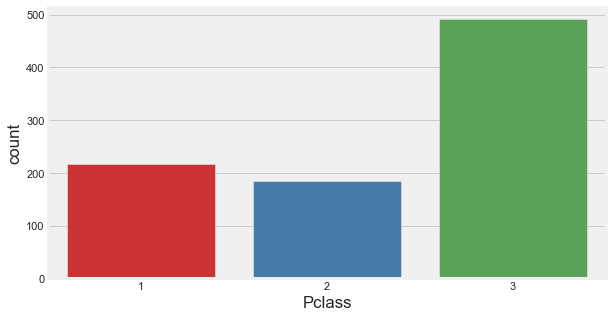

In [13]:
import matplotlib.style as style
plt.figure(figsize=(10,5))

style.use('fivethirtyeight')
ax = sns.countplot(ship['Pclass'], palette = 'Set1')
plt.xticks(rotation = 0)
plt.show()

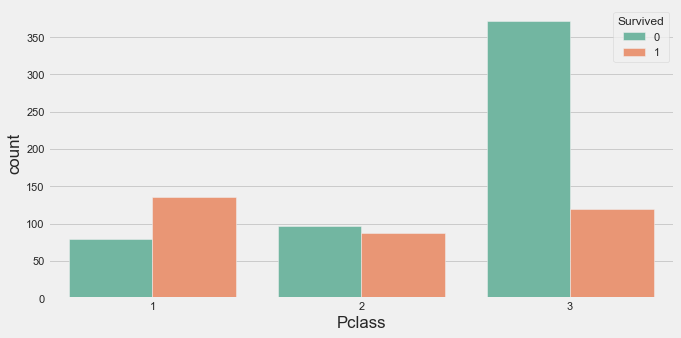

In [14]:
plt.figure(figsize=(10,5))
style.use('fivethirtyeight')
ax = sns.countplot(x ='Pclass', hue = 'Survived', data=ship, palette = 'Set2')
plt.xticks(rotation = 0)
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='count'>

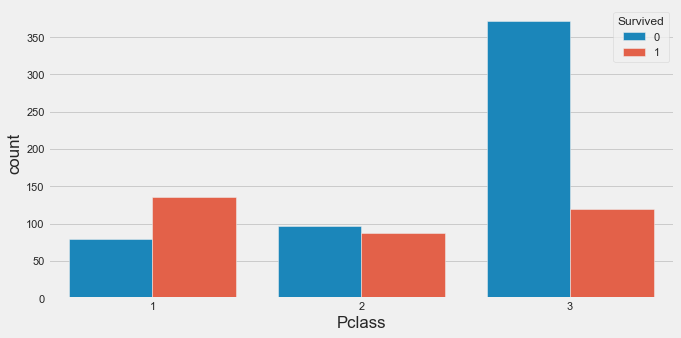

In [15]:
#  control plot size
plt.figure(figsize=(10,5))
sns.countplot(x ='Pclass', hue = 'Survived', data=ship)

<Figure size 720x360 with 0 Axes>

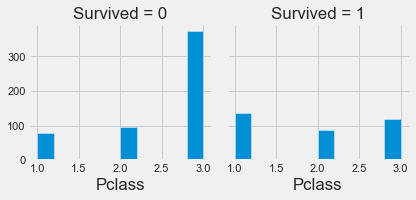

In [16]:
plt.figure(figsize=(10,5))
g = sns.FacetGrid(ship, col='Survived')
g.map(plt.hist, 'Pclass', bins=10)

### +1 Univariate Categorical Graph Selected 

Text(0.5, 1.0, 'Conversion Plot of Pclass')

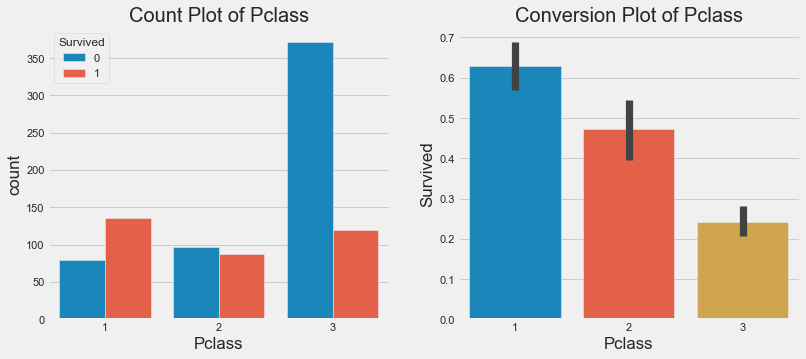

<Figure size 720x360 with 0 Axes>

In [17]:
#  control plot size

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

plt.figure(figsize=(10,5))
sns.countplot(x ='Pclass', hue = 'Survived', data=ship, ax=ax[0])
ax[0].set_title('Count Plot of Pclass', fontsize=20)

sns.barplot(x='Pclass', y='Survived', data=ship, ax=ax[1])
ax[1].set_title('Conversion Plot of Pclass', fontsize=20)

###  + 1 function made

In [18]:
def cat_graph(x, hue, data):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
    sns.countplot(x=x, hue= hue, data=data, ax=ax[0])
    ax[0].set_title('Count Plot of {}'.format(x), fontsize=16)
    sns.barplot(x=x, y=hue, data=data, ax=ax[1]);
    ax[1].set_title('Mean Conversion Rate per {}'.format(x), fontsize=16)
    plt.tight_layout()
    plt.show()
    return

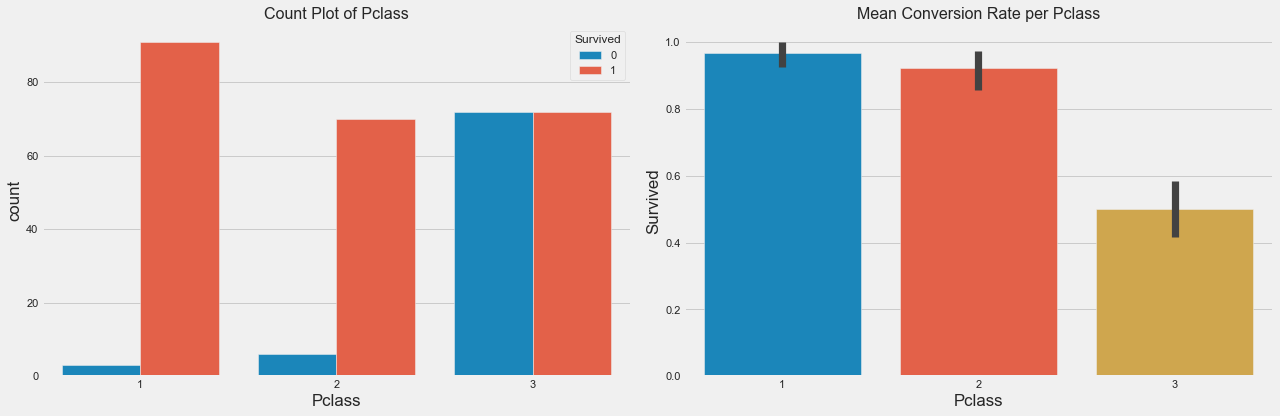

In [19]:
cat_graph('Pclass', 'Survived', ship.loc[ship['Sex']=='female'])

## Numerical Variables 

- variable distribution (density shape)
- boxplot
- conversion
- bin 
- show differnt conversion rates on different segments



In [197]:
ship[['Age','Survived']].groupby(['Age']).agg({'Survived': 'sum'}).sort_values('Age', ascending = True)

,Survived
Age,
0.42,1
0.67,1
0.75,2
0.83,2
0.92,1
...,...
70.00,0
70.50,0
71.00,0


In [188]:
ship[['Age','Survived']].sort_values('Age')

,Age,Survived
803,0.42,1
755,0.67,1
644,0.75,1
469,0.75,1
78,0.83,1
...,...,...
859,NaN,0
863,NaN,0
868,NaN,0
878,NaN,0


In [193]:
ship.loc[ship['Age'] < 2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,NaN,S
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.00,0,2,2653,15.7417,NaN,C
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.00,5,2,CA 2144,46.9000,NaN,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S


<AxesSubplot:xlabel='Survived', ylabel='Age'>

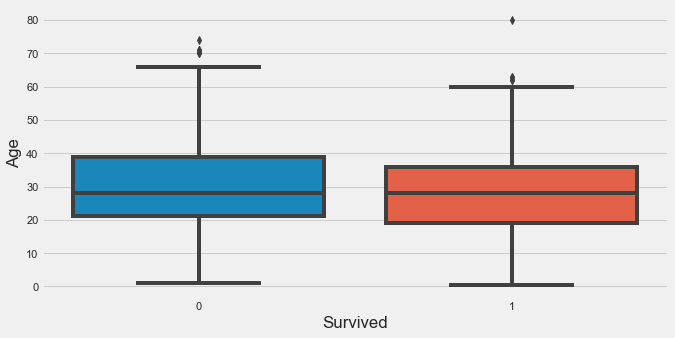

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(y = ship['Age'], x = ship['Survived'])

<AxesSubplot:xlabel='Age', ylabel='count'>

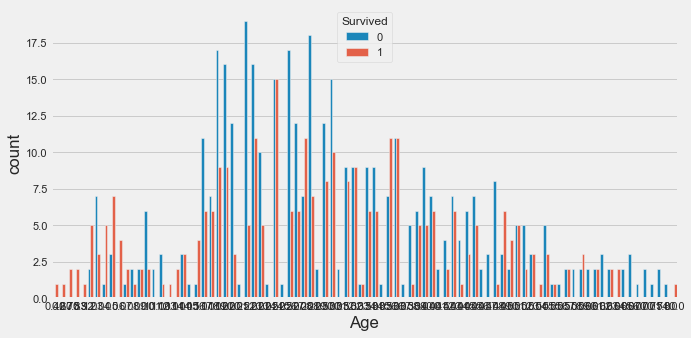

In [204]:
# this is only applicable for categorical variable since there are fewer values
plt.figure(figsize=(10,5))
sns.countplot(x = 'Age', hue = 'Survived', data = ship)

<AxesSubplot:xlabel='Age', ylabel='Survived'>

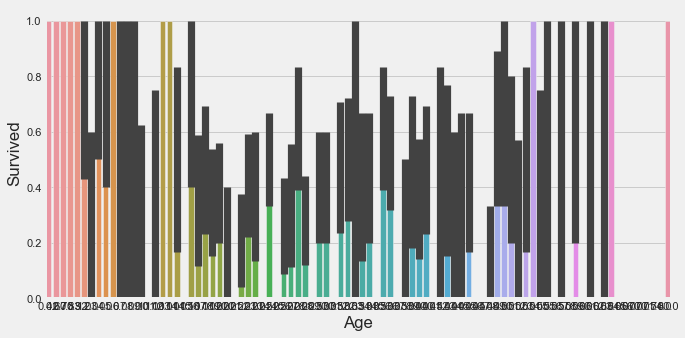

In [205]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'Age', y = 'Survived', data = ship)

<AxesSubplot:xlabel='Age', ylabel='Count'>

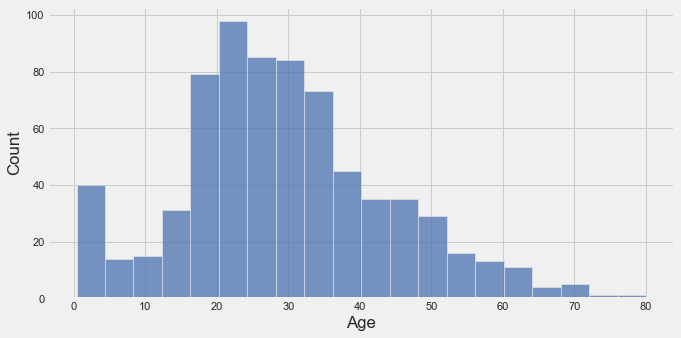

In [209]:
plt.figure(figsize=(10,5))
sns.histplot(x = 'Age',  data = ship)

<Figure size 4000x500 with 0 Axes>

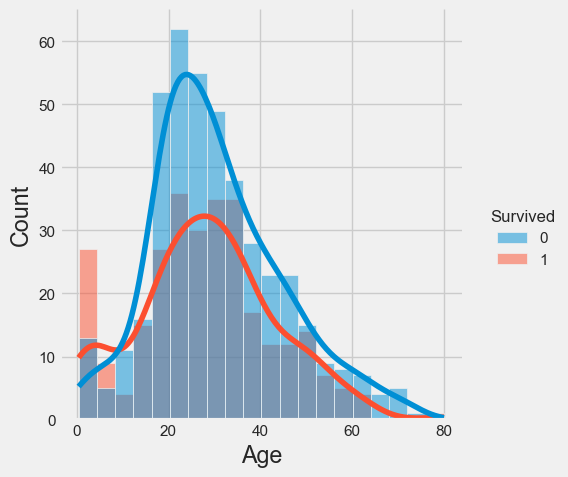

In [277]:
plt.figure(figsize=(40,5))
sns.displot(x = 'Age',  data = ship, kind='hist', kde = True, hue='Survived')


In [266]:
age = ship[(ship['Age'] >= 20) & (ship['Age'] <= 24)][['Age','Survived']]
pd.crosstab(age['Age'], age['Survived'], margins=True)

Survived,0,1,All
Age,,,
20.0,12,3,15
20.5,1,0,1
21.0,19,5,24
22.0,16,11,27
23.0,10,5,15
23.5,1,0,1
24.0,15,15,30
All,74,39,113


In [269]:
# use excel to verify the graph

ship[['Age','Survived']].to_excel('age.xlsx')

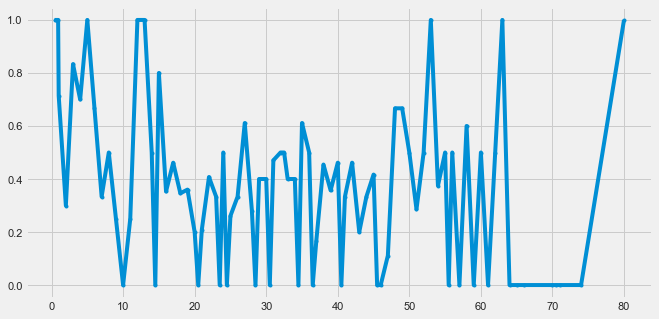

In [241]:
plt.figure(figsize=(10,5))
grouped = ship[['Age', 'Survived']].groupby('Age').mean().reset_index()
plt.plot(grouped['Age'], grouped['Survived'], '.-')

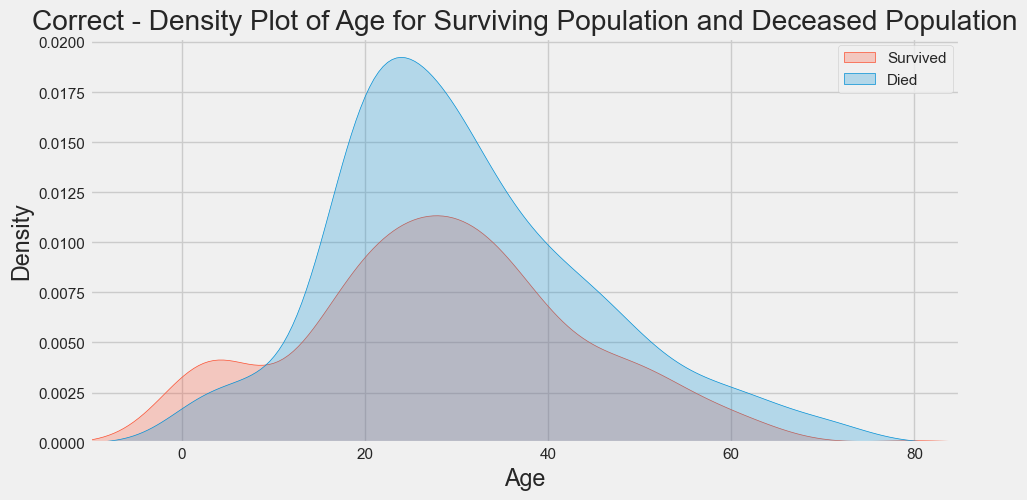

In [278]:
plt.figure(figsize=(10,5))

ax = sns.kdeplot(x = ship["Age"], hue = ship['Survived'] , shade=True)
  
plt.legend(['Survived', 'Died'])
plt.title('Correct - Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

## +1 Numerical variable distribution

### even without visible conversion graph, it is still help to view the distributions of 2 differnt types
### Becareful with the graph, if use differnt command, the graph may be wrong

## Not sure how to demonstrate conversion graph

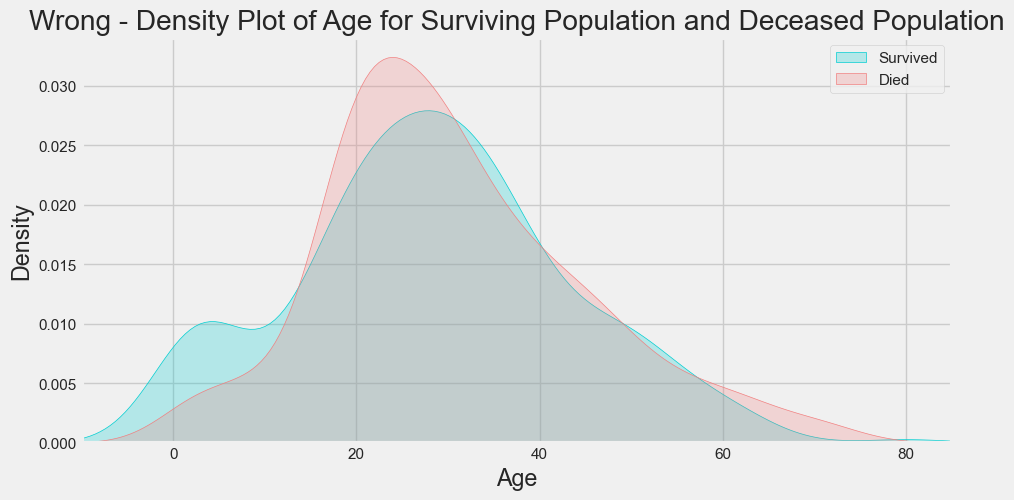

In [280]:
# this graph maybe wrong ????????????????????????????????????????????????????????
# https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python/notebook (original place)
plt.rcParams['figure.dpi'] = 100

plt.figure(figsize=(10,5))

ax = sns.kdeplot(ship["Age"][ship.Survived == 1], color="darkturquoise", shade=True)
ax = sns.kdeplot(ship["Age"][ship.Survived == 0], color="lightcoral", shade=True)
    
plt.legend(['Survived', 'Died'])
plt.title('Wrong - Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

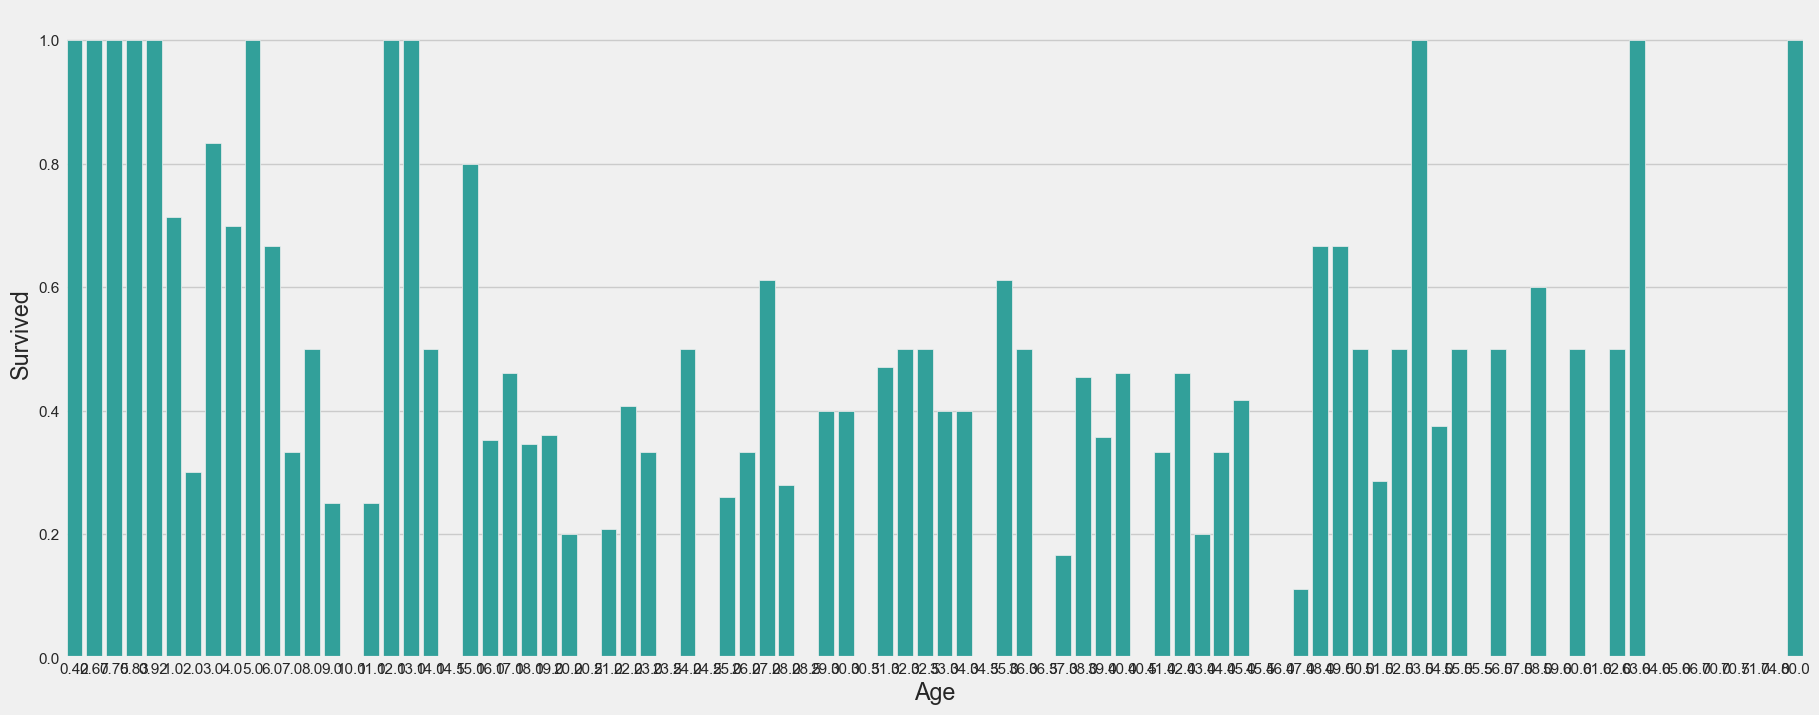

In [281]:
plt.figure(figsize=(20,8))
avg_survival_byage = ship[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color="LightSeaGreen")
plt.show()

In [282]:
ship.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


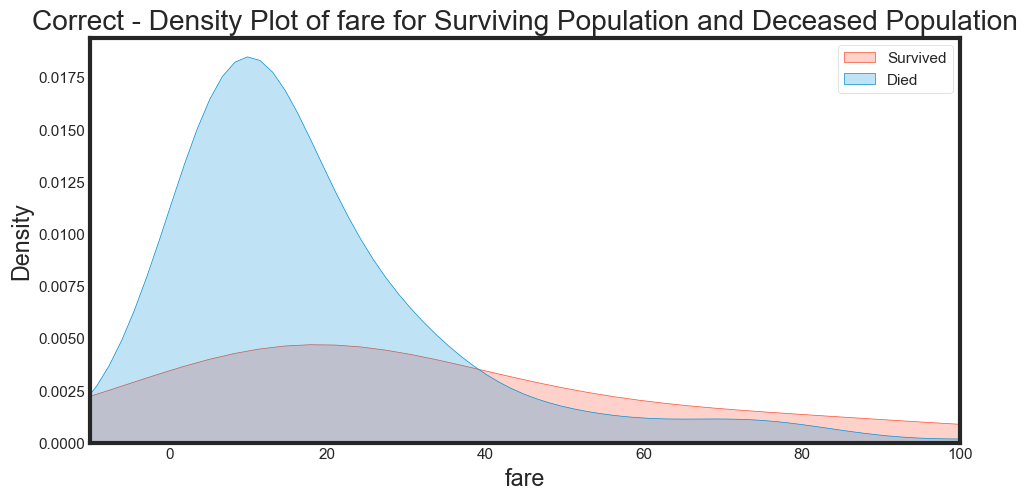

In [513]:
plt.figure(figsize=(10,5))

ax = sns.kdeplot(x = ship["Fare"], hue = ship['Survived'] , shade=True)
  
plt.legend(['Survived', 'Died'])
plt.title('Correct - Density Plot of fare for Surviving Population and Deceased Population')
ax.set(xlabel='fare')
plt.xlim(-10,100)
plt.show()

In [514]:
def num_graph(x, hue, data):
    plt.figure(figsize=(10,5))
    plt.legend(['Survived', 'Died'])
    
    sns.kdeplot(x=x, hue= hue, data=data, shade=True)
    
    ax.set_title('Density Plot of fare for Surviving Population and Deceased Population {}'.format(x), fontsize=16)
    ax.set(xlabel='fare')
    plt.xlim(-10,120)
    
    plt.show()
    return

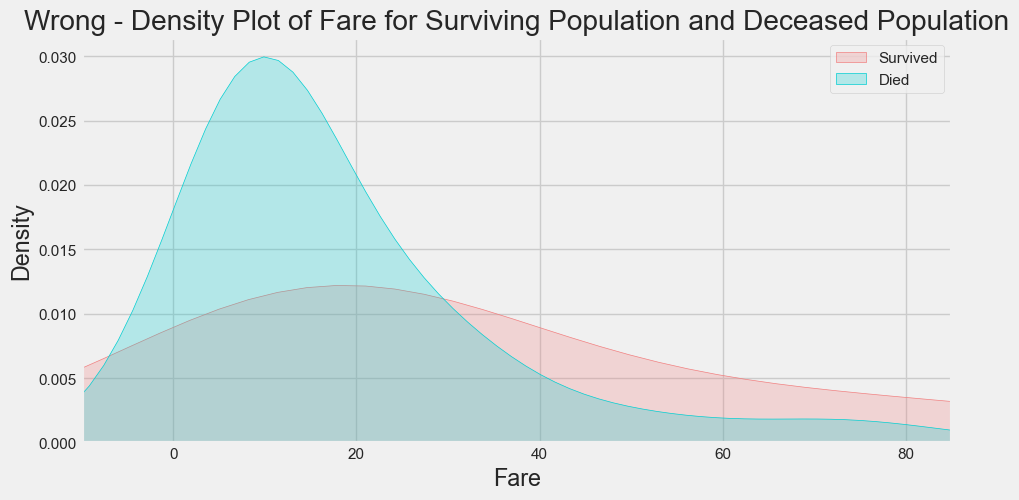

In [285]:
plt.figure(figsize=(10,5))

ax = sns.kdeplot(ship["Fare"][ship.Survived == 1], color="lightcoral", shade=True)
ax = sns.kdeplot(ship["Fare"][ship.Survived == 0], color="darkturquoise", shade=True)
    
plt.legend(['Survived', 'Died'])
plt.title('Wrong - Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-10,85)
plt.show()

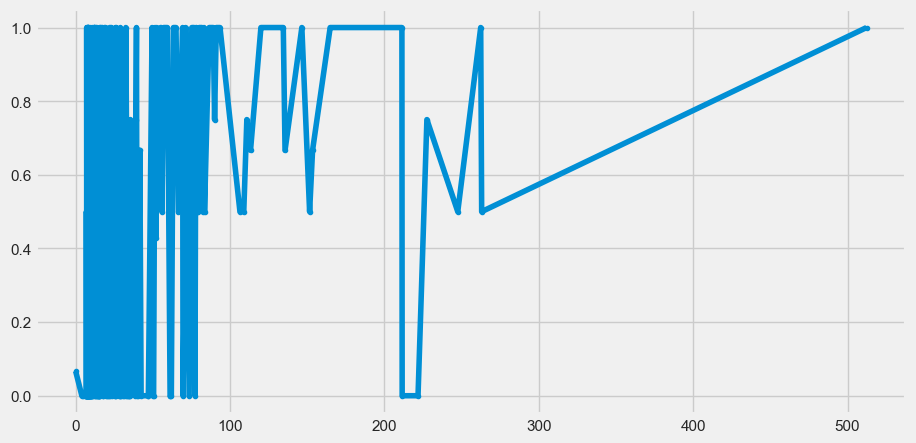

In [286]:
plt.figure(figsize=(10,5))
grouped = ship[['Fare', 'Survived']].groupby('Fare').mean().reset_index()
plt.plot(grouped['Fare'], grouped['Survived'], '.-')

## Multiple Categorical variables 

In [287]:
ship.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [291]:
ship_catv = ship[['Pclass','Sex','Parch','Embarked','Survived']]

In [297]:
ship.pivot_table(index = ['Pclass','Sex','Embarked'], aggfunc = 'mean', values = 'Survived')

Survived
Pclass Sex    Embarked          
1      female C         0.976744
              Q         1.000000
              S         0.958333
       male   C         0.404762
              Q         0.000000
              S         0.354430
2      female C         1.000000
              Q         1.000000
              S         0.910448
       male   C         0.200000
              Q         0.000000
              S         0.154639
3      female C         0.652174
              Q         0.727273
              S         0.375000
       male   C         0.232558
              Q         0.076923
              S         0.128302

<Figure size 2000x2000 with 0 Axes>

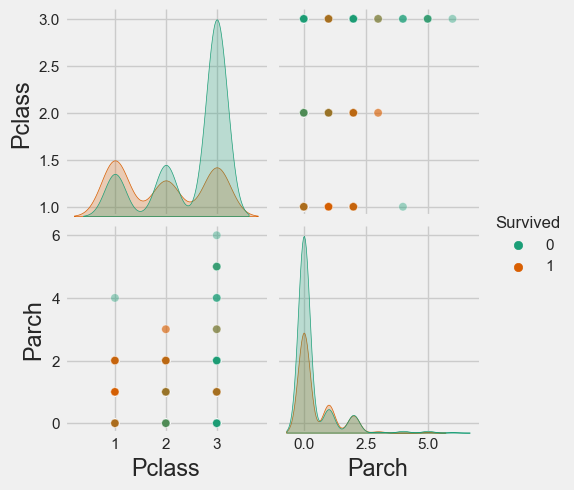

In [300]:
# not sure how to use them

plt.figure(figsize =(20,20))
sns.pairplot(ship[['Pclass','Sex','Parch','Embarked','Survived']], hue="Survived",kind='scatter', plot_kws={'alpha':0.4},palette = 'Dark2')                                  
plt.show()

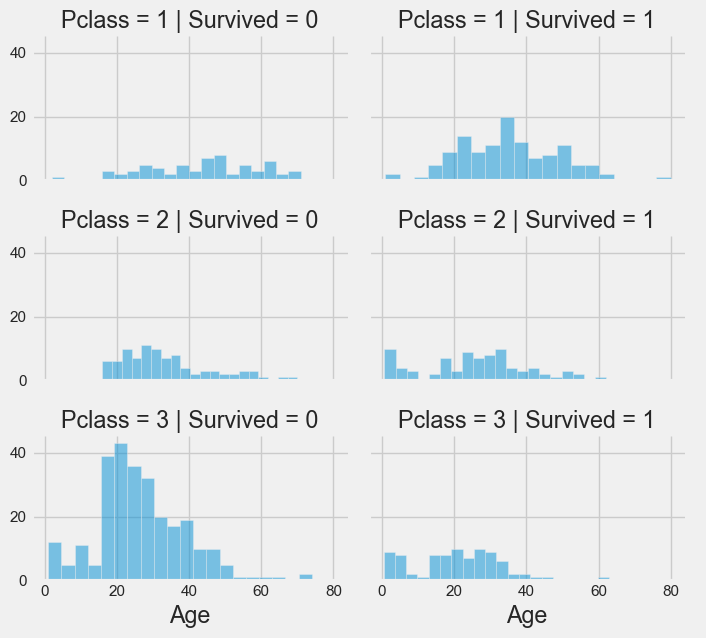

In [308]:
grid = sns.FacetGrid(ship, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

## +1  this can demonstrate  relationship among 2, 3 ,4 categorical variables with coversion%
 

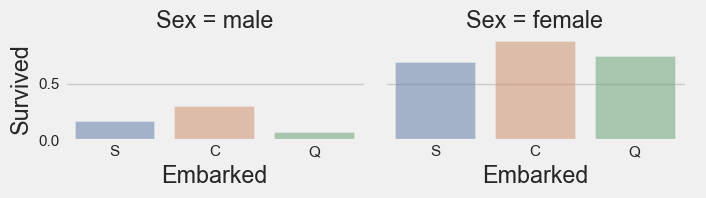

In [323]:
grid = sns.FacetGrid(ship, col='Sex',  height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Embarked', 'Survived', alpha=.5, ci=None, palette='deep', order = ['S', 'C', 'Q'])
grid.add_legend();

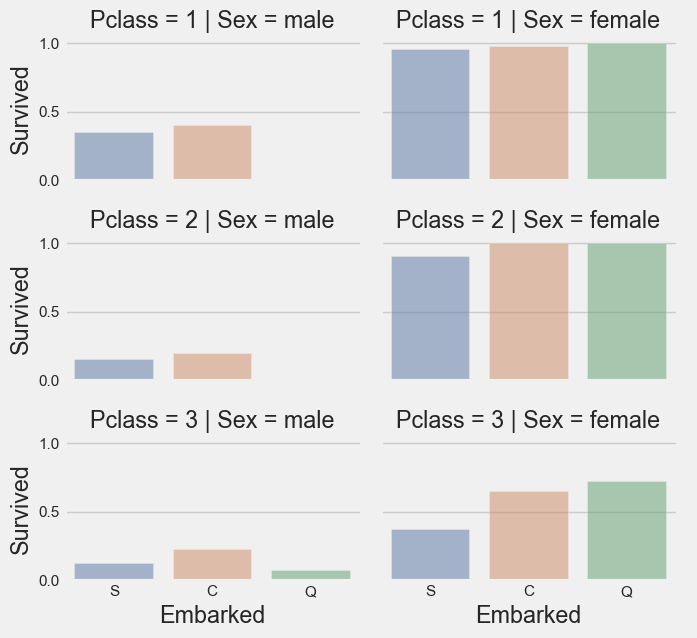

In [322]:
grid = sns.FacetGrid(ship, col='Sex', row='Pclass', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Embarked', 'Survived', alpha=.5, ci=None, palette='deep', order = ['S', 'C', 'Q'])
grid.add_legend();

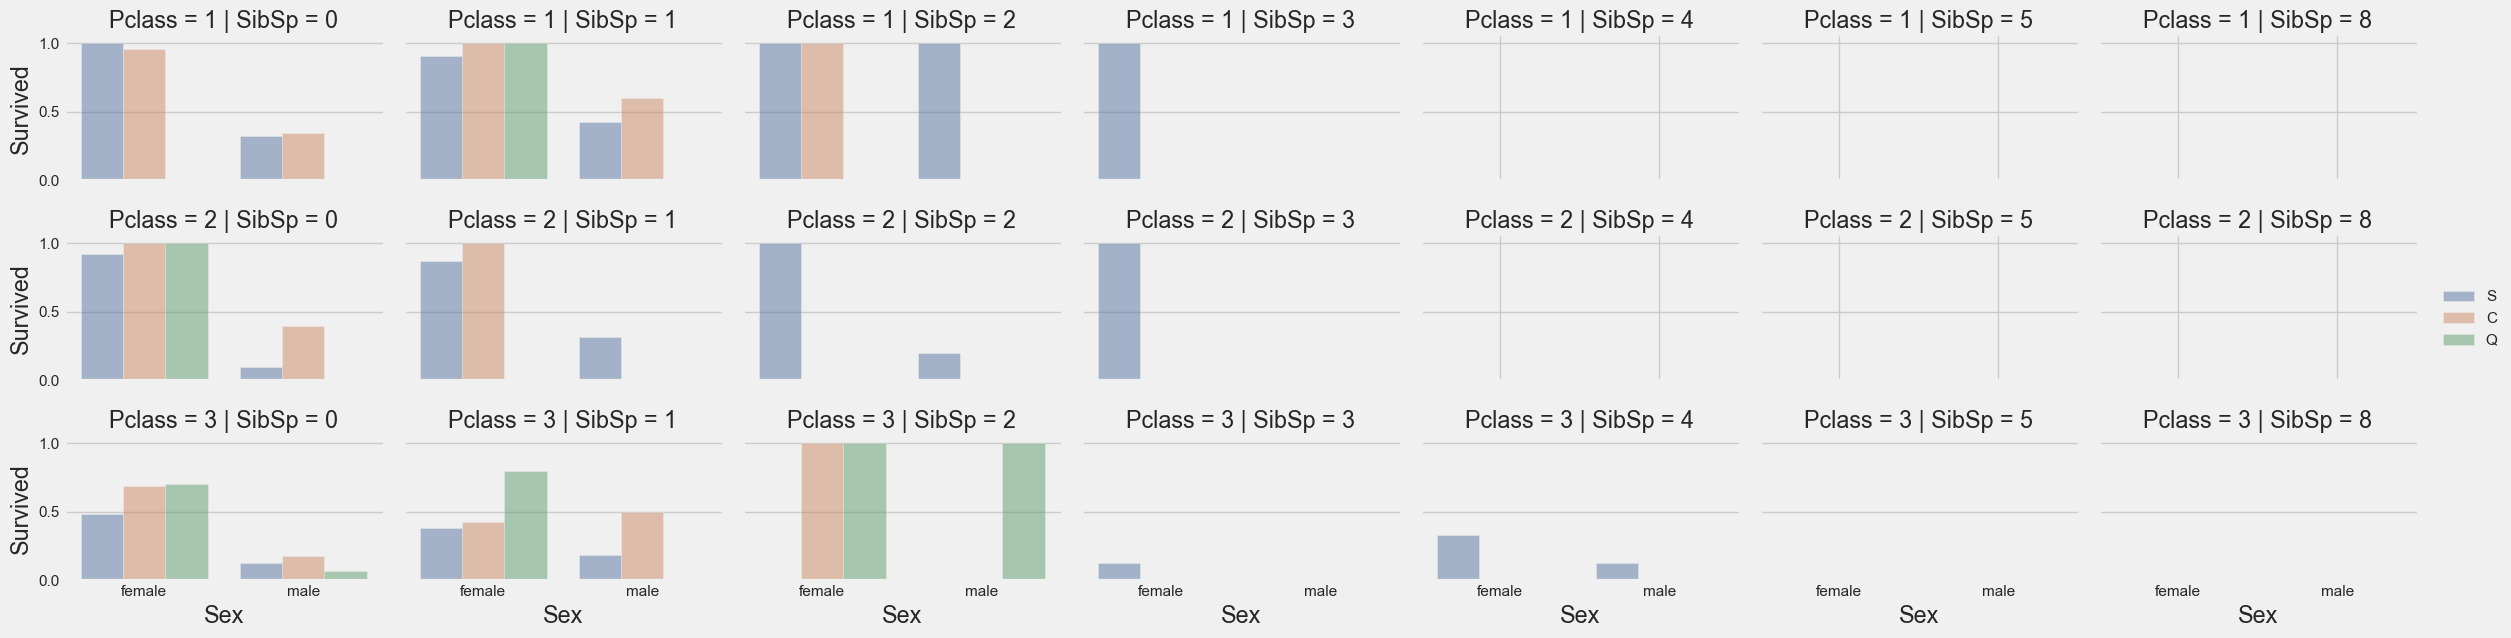

In [326]:
grid = sns.FacetGrid(ship, row='Pclass', col='SibSp', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Survived', 'Embarked', alpha=.5, ci=None, palette='deep', order = ['female', 'male'], hue_order = ['S', 'C', 'Q'])
grid.add_legend()

## Text extraction  + 1

In [327]:
ship.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
ship['Name']

# https://pandas-docs.github.io/pandas-docs-travis/user_guide/text.html

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [22]:
ship['Title'] =ship['Name'].str.extract('([A-Za-z]+)\.', expand=False)

pd.crosstab(ship['Title'], ship['Sex'])

#dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 #	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [23]:

ship['Title'] = ship['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

ship['Title'] = ship['Title'].replace('Mlle', 'Miss')
ship['Title'] = ship['Title'].replace('Ms', 'Miss')
ship['Title'] = ship['Title'].replace('Mme', 'Mrs')
    
ship[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [534]:
ship.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,FareBand,Age*Class,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,"(11.789, 23.157]","(-0.512, 102.466]",66.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,"(34.526, 45.894]","(-0.512, 102.466]",38.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,"(23.157, 34.526]","(-0.512, 102.466]",78.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,"(34.526, 45.894]","(-0.512, 102.466]",35.0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,"(34.526, 45.894]","(-0.512, 102.466]",105.0,1


# Feature Imputation


### if there are lots of feature, should we consider to delete some meaningless variable
   #### variable has too many missing value
   #### variable has 1 value
    
## fill in value with:
   ### mode, median, mean ....
   ### mean of certain segments
   ## Using PCA to fill missing value


In [ ]:
# Using Pivot table is a easy to study how to fill in the value


# Embarked
# Age
# Cabin  

In [360]:
ship[ship['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs


In [24]:
# for people in pclass = 1, people tends to came in from S 
print(ship.pivot_table(values = 'PassengerId', index = ['Pclass'], columns = ['Embarked'], aggfunc = 'count'))
print('----------------------------------------------')
print('----------------------------------------------')
# for female in pclass = 1, half of female population came in from c, the other half came from S 
print(ship.pivot_table(values = 'PassengerId', index = ['Pclass', 'Sex'], columns = ['Embarked'], aggfunc = 'count'))


print('----------------------------------------------')
print('----------------------------------------------')
# for female in pclass = 1, half of female population came in from c, the other half came from S 
# younger age tends to came in from S

print(ship.pivot_table(values = 'Age', index = ['Pclass', 'Sex'], columns = ['Embarked'], aggfunc = 'mean'))

print('**********************************************')
print('----------------------------------------------')

# for female in pclass = 1, half of female population came in from c, the other half came from S 
# younger age tends to came in from S
# people from C tend to have 0 (Sibsp and Parch)

ship.pivot_table(values = ['SibSp','Parch'], index = ['Pclass', 'Sex'], columns = ['Embarked'], aggfunc = 'mean')


Embarked   C   Q    S
Pclass               
1         85   2  127
2         17   3  164
3         66  72  353
----------------------------------------------
----------------------------------------------
Embarked        C   Q    S
Pclass Sex                
1      female  43   1   48
       male    42   1   79
2      female   7   2   67
       male    10   1   97
3      female  23  33   88
       male    43  39  265
----------------------------------------------
----------------------------------------------
Embarked               C          Q          S
Pclass Sex                                    
1      female  36.052632  33.000000  32.704545
       male    40.111111  44.000000  41.897188
2      female  19.142857  30.000000  29.719697
       male    25.937500  57.000000  30.875889
3      female  14.062500  22.850000  23.223684
       male    25.016800  28.142857  26.574766
**********************************************
----------------------------------------------


Parch                         SibSp                    
Embarked              C         Q         S         C         Q         S
Pclass Sex                                                               
1      female  0.302326  0.000000  0.625000  0.511628  1.000000  0.604167
       male    0.333333  0.000000  0.253165  0.238095  2.000000  0.329114
2      female  0.571429  0.000000  0.626866  0.714286  0.000000  0.477612
       male    0.500000  0.000000  0.195876  0.500000  0.000000  0.329897
3      female  0.826087  0.242424  1.000000  0.565217  0.212121  1.238636
       male    0.139535  0.128205  0.252830  0.232558  0.589744  0.528302

In [387]:
# Use mode  S
# for passengerId = 62 & 830

ship[ship['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs


In [394]:
ship.loc[(ship['PassengerId'] == 62) | (ship['PassengerId'] == 830)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs


In [25]:
# using mode to replace missing value

ship["Embarked"].fillna(ship['Embarked'].value_counts().idxmax())
ship.loc[(ship['PassengerId'] == 62) | (ship['PassengerId'] == 830)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs


### fill in value with mode + 1

-- use index
-- use mode
-- apply function to check missing value condition

In [404]:
# fill in value with mode

ship["Embarked"].fillna(ship['Embarked'].value_counts().idxmax(), inplace = True)
ship.loc[(ship['PassengerId'] == 62) | (ship['PassengerId'] == 830)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S,Mrs


In [26]:
print('Age with most values %.2f'%ship['Age'].mode()[0])

ship.loc[(ship['Age'] < 27) & (ship['Age'] > 26) ]

Age with most values 24.00


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


In [27]:
ship['Age'].mode()[0]

24.0

In [474]:
# define a function

def check_missing_value(x):
    return x.isnull().sum()

In [475]:
check_missing_value(ship['Cabin'])

687

In [476]:
ship.apply(check_missing_value, axis=0)

ship.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

###  Age  + 1 fill in numerical value with mean

-- fill in missing value based on segment mean
-- bin age into several range

In [ ]:
# 1st step: map sex into 1 & 2
# based on sex and Pclass, fill missing age with median age value

for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()


for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & 
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

In [416]:
# 1. select variables for segments
# 2. calculate mean age for each segment
# 3. fill in missing value with values from those segments


ship.loc[ship['Age'].isnull()].pivot_table(values = 'PassengerId', index = ['Pclass','Sex'], aggfunc = 'count')

PassengerId
Pclass Sex                
1      female            9
       male             21
2      female            2
       male              9
3      female           42
       male             94

In [28]:
# calculate mean age for each segment
impute_grps = ship.pivot_table(values=["Age"], index=["Pclass","Sex"], aggfunc=np.mean)
impute_grps

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [29]:
# 2. calculate mean age for each segment
impute_grps = ship.pivot_table(values=["Age"], index=["Pclass","Sex"], aggfunc=np.mean)

print(ship.loc[(ship['Pclass'] == 1) & (ship['Sex'] == 'female')]['Age'].mean(skipna=True))
print('The mean age of female at class 1 excluding missing value is %.2f' %ship.loc[(ship['Pclass'] == 1) & (ship['Sex'] == 'female')]['Age'].mean(skipna=True))

impute_grps


34.61176470588235
The mean age of female at class 1 excluding missing value is 34.61


Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [30]:
#3. fill in missing value with values from those segments


# tuple to fill in value
# if not many segments, you can do hard-coding 


for i,row in ship.loc[ship['Age'].isnull(), :].iterrows():
    ind = tuple([row['Pclass'],row['Sex']])
    ship.loc[i,'Age'] = impute_grps.loc[ind].values[0]

    
 # include null values, the mean produces valid same value  
print(ship.loc[(ship['Pclass'] == 1) & (ship['Sex'] == 'female')]['Age'].mean(skipna=False))

34.61176470588236


### Drop less meaningful variables
### Drop variables with many missing values

# Feature engineering

    - Numerical variables : check odd values, or create bins 
    - Categorical variables: check odd values, or combine values with few counts
    - Interaction term
    - Combine several variables

In [477]:
ship.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


## Create bins for numerical variables + 1

### Is it necessary to do so? why do we need to convert numerical variables into categorical?
### If we do need to do so, what strategy?
    ### check odd values first
    ### look at distribution charts vs. conversion
    ### create bins for example, 5, 10, 15
    ### look at the categorical distribution vs. conversion
 

<AxesSubplot:xlabel='Age'>

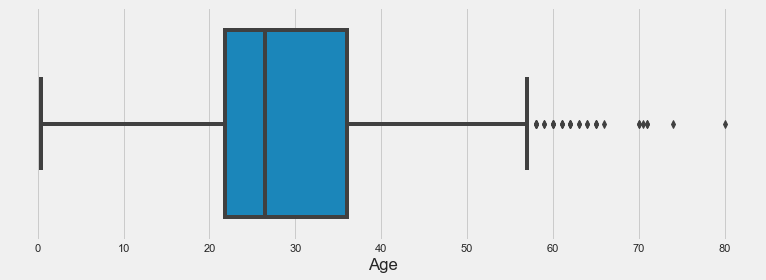

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
sns.boxplot(x='Age', data=ship)

#### Use percentile to look at the distribution more accurate  
#### advanced boxplot or violin plot



No handles with labels found to put in legend.


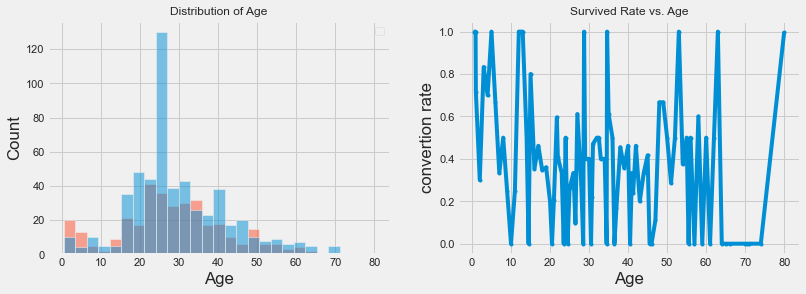

In [32]:
# distribution of age vs. survival
grouped = ship[['Age', 'Survived']].groupby('Age').mean().reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.histplot(x = ship["Age"], hue = ship['Survived'] , ax=ax[0])

ax[0].set_title('Distribution of Age', fontsize=12)
ax[0].legend()

ax[1].plot(grouped['Age'], grouped['Survived'], '.-')
ax[1].set_title('Survived Rate vs. Age', fontsize=12)
ax[1].set_xlabel('Age')
ax[1].set_ylabel('convertion rate')
ax[1].grid(True)

plt.show()

In [33]:
num_graph('Age', 'Survived', ship)

NameError: name 'num_graph' is not defined

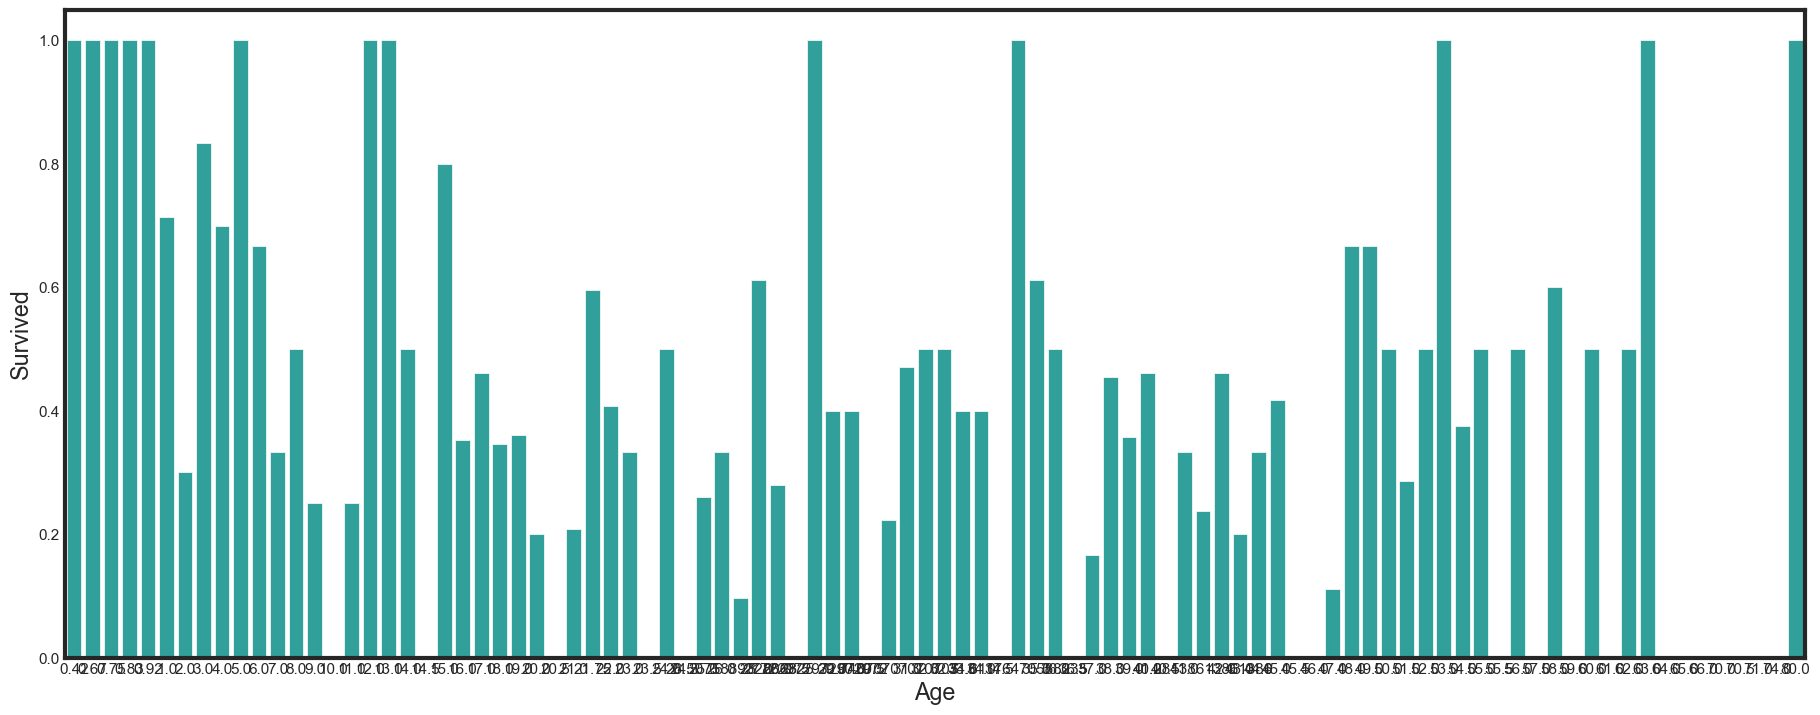

In [497]:
plt.figure(figsize=(20,8))
avg_survival_byage = ship[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color="LightSeaGreen")
plt.show()

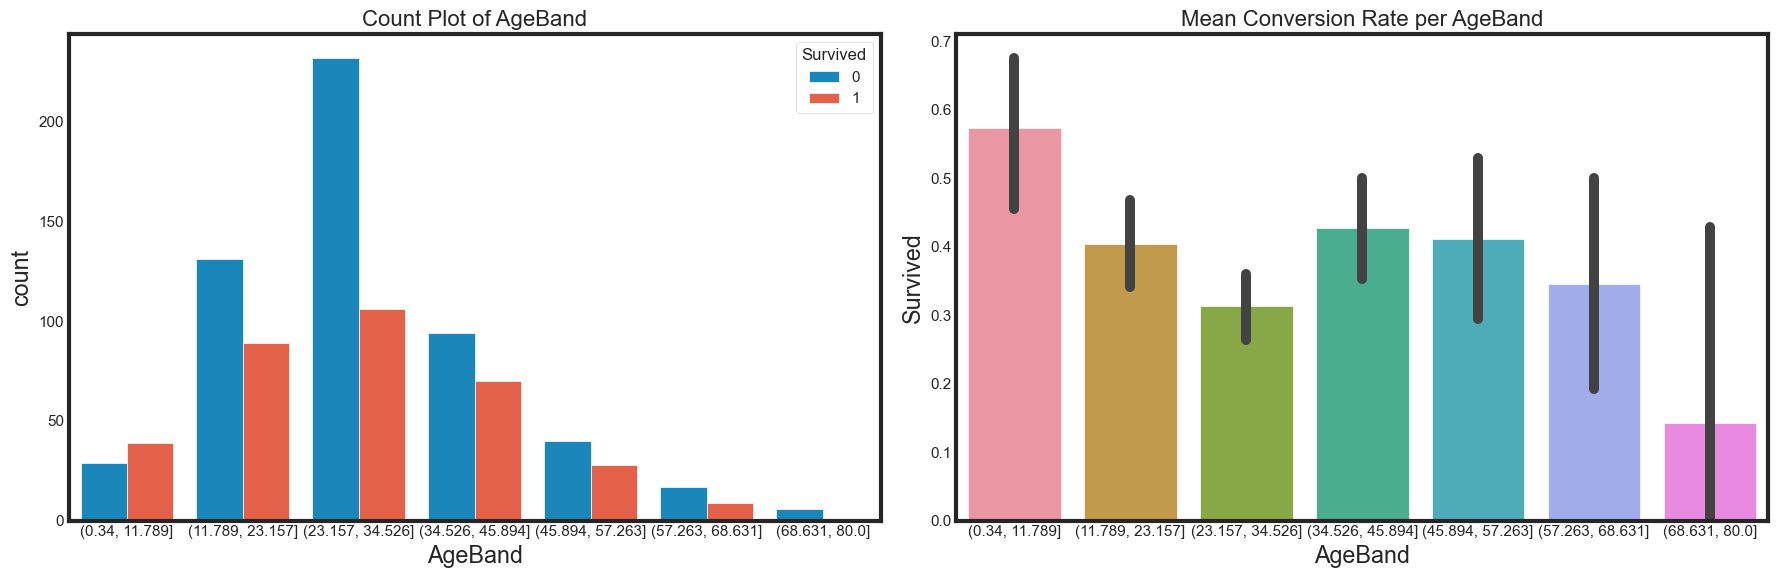

In [507]:
ship['AgeBand'] = pd.cut(ship['Age'], 7)
ship[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

cat_graph('AgeBand', 'Survived', ship)

### Specify bin points + 1 

In [ ]:
#Binning:
def binning(col, cut_points, labels=None):

#Define min and max values:
    minval = col.min()
    maxval = col.max()

#create list by adding min and max to cut_points
    break_points = [minval] + cut_points + [maxval]

#if no labels provided, use default labels 0 ... (n-1)
    if not labels:
        labels = range(len(cut_points)+1)

#Binning using cut function of pandas
    colBin = pd.cut(col, bins=break_points, labels=labels, include_lowest=True)
      
    return colBin

#Binning age:
cut_points = [90,140,190]

labels = ["low", "medium", "high", "very high"]

data["LoanAmount_Bin"] = binning(data["LoanAmount"], cut_points, labels)

print (pd.value_counts(data["LoanAmount_Bin"], sort=False))

### Apply categorical graph to variables like price (too many segments) is not helpful   + 1

### 1. Instead for this case, use box plot 
### 2. also use density plot for numerical variables
### 3. consider only apply bining for fare below 100, combine 100~200, and fare above 200+ as separate segments
### 4. after creating the range, transform them into ordinal variables


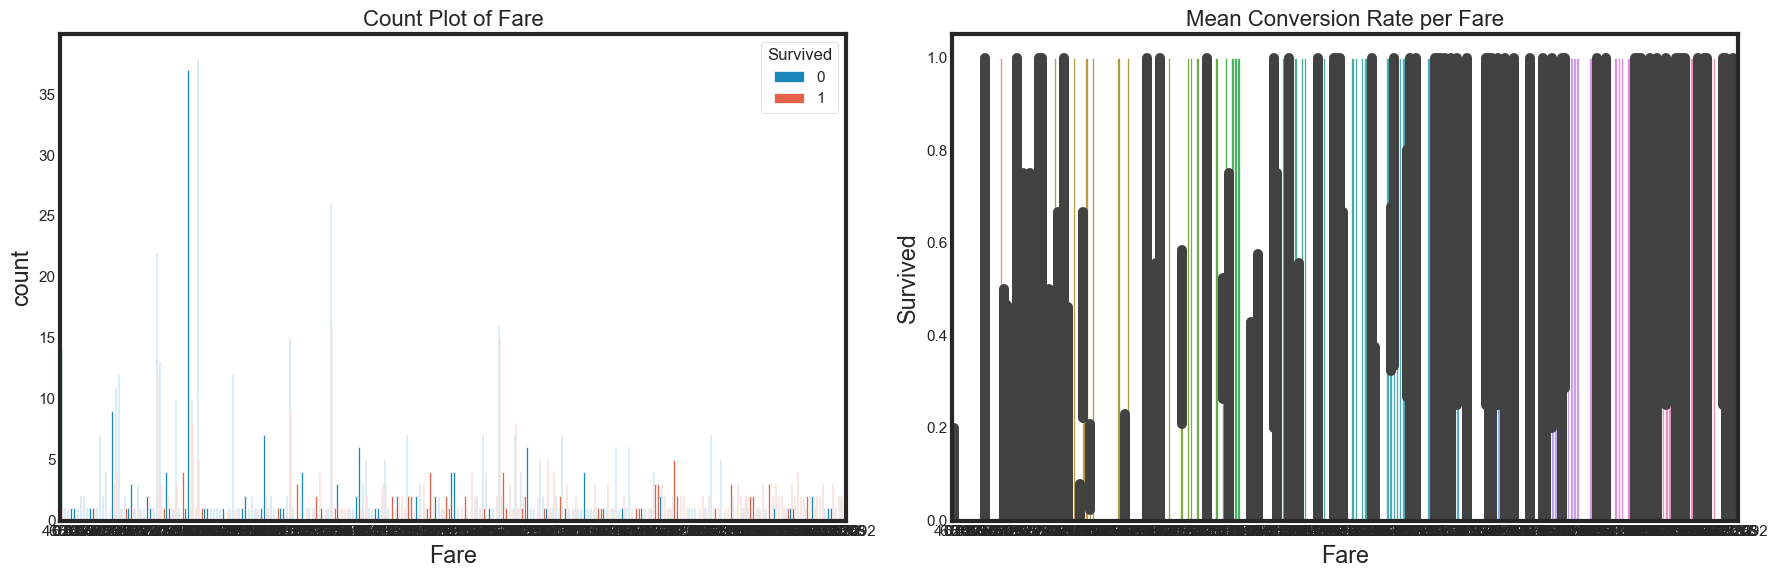

In [511]:
cat_graph('Fare', 'Survived', ship)

<AxesSubplot:xlabel='Fare'>

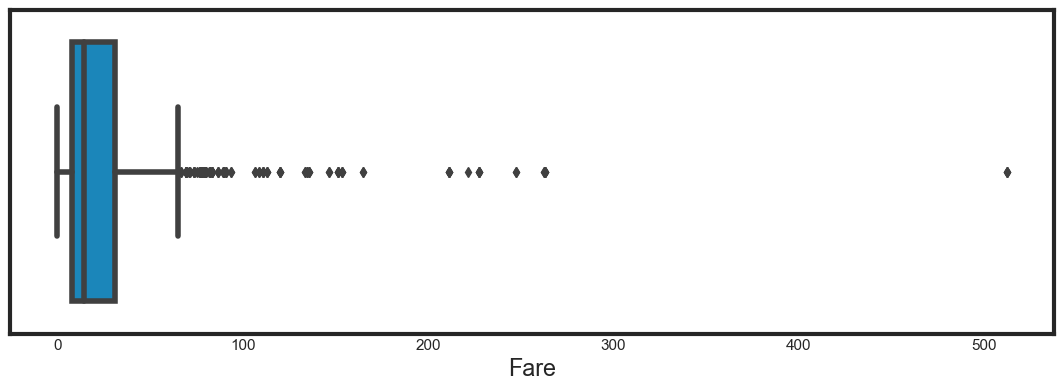

In [516]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
sns.boxplot(x='Fare', data=ship)

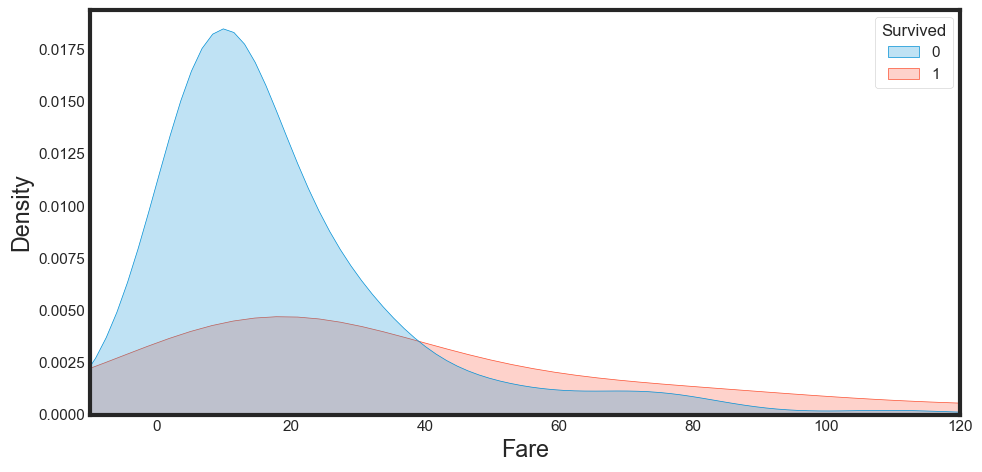

In [515]:
num_graph('Fare', 'Survived', ship)

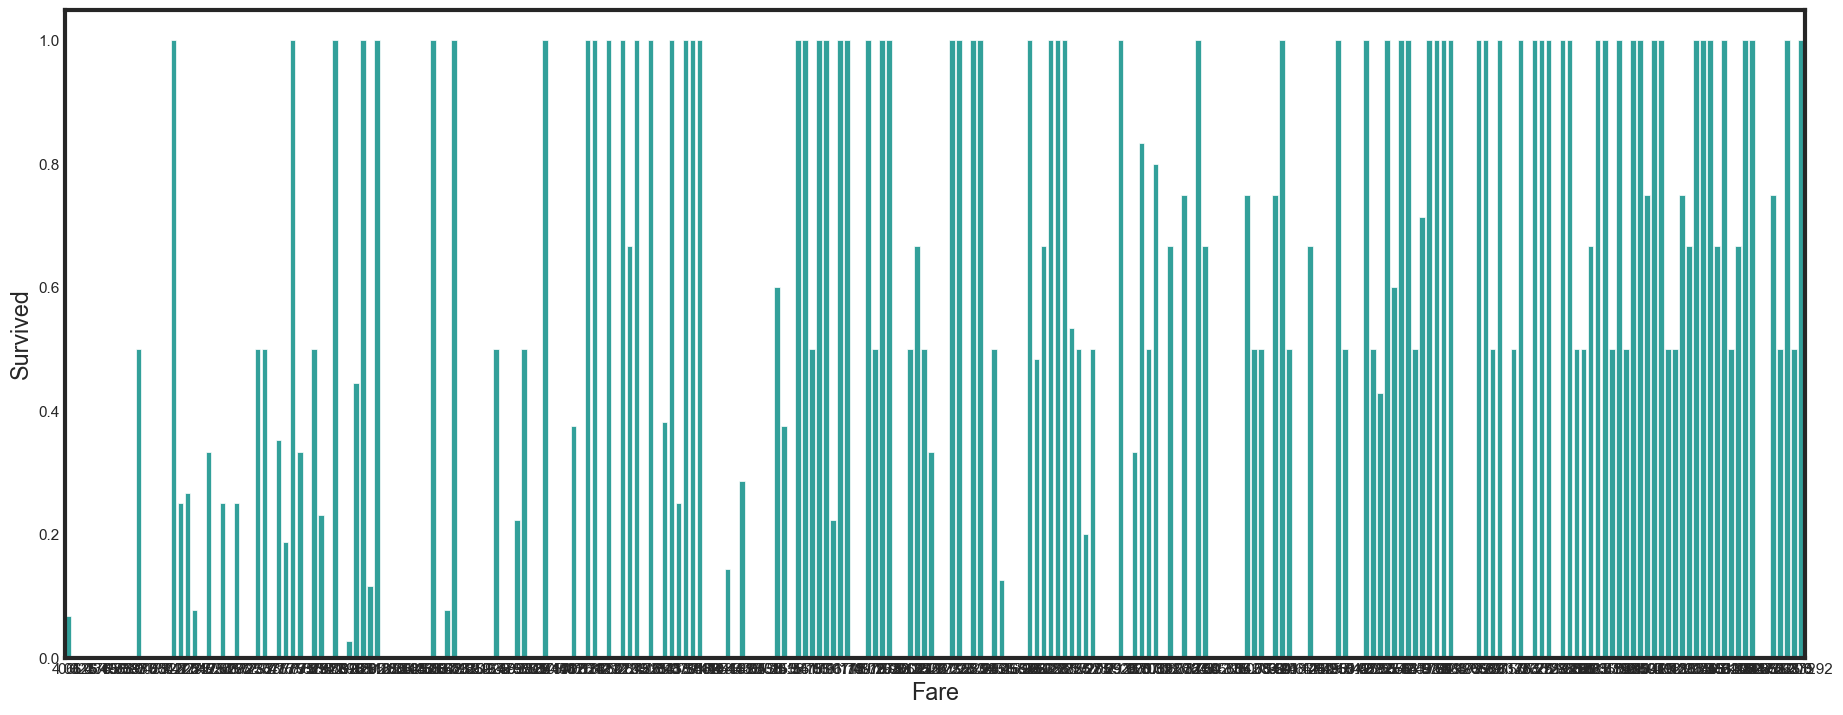

In [498]:
plt.figure(figsize=(20,8))
avg_survival_byage = ship[["Fare", "Survived"]].groupby(['Fare'], as_index=False).mean()
g = sns.barplot(x='Fare', y='Survived', data=avg_survival_byage, color="LightSeaGreen")
plt.show()

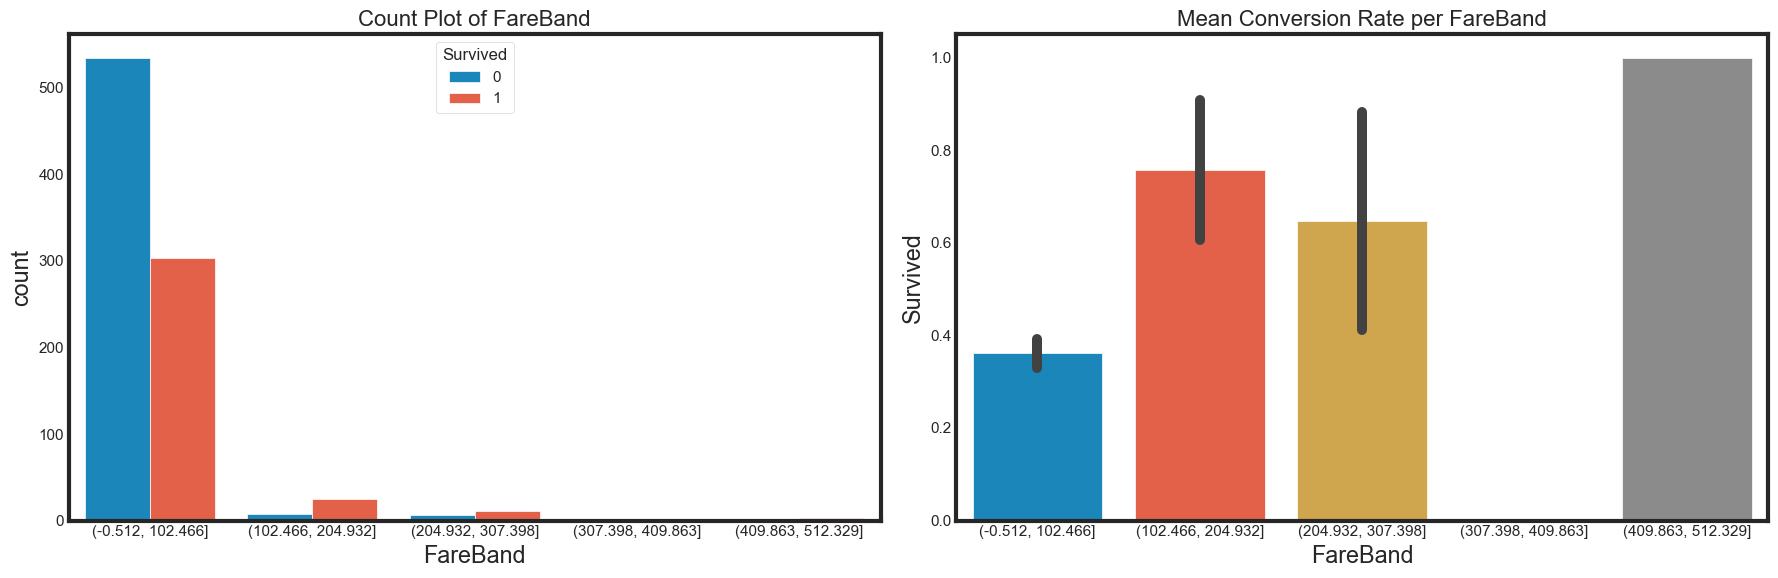

In [510]:
ship['FareBand'] = pd.cut(ship['Fare'], 5)
ship[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

cat_graph('FareBand', 'Survived', ship)

In [ ]:
# converting numerical variables with range into ordinal values 

for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [530]:
ship.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,FareBand,Age*Class,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,"(11.789, 23.157]","(-0.512, 102.466]",66.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,"(34.526, 45.894]","(-0.512, 102.466]",38.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,"(23.157, 34.526]","(-0.512, 102.466]",78.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,"(34.526, 45.894]","(-0.512, 102.466]",35.0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,"(34.526, 45.894]","(-0.512, 102.466]",105.0,1


In [34]:
# Interaction Item

ship['Age*Class'] = ship.Age * ship.Pclass

In [35]:
# Create new variables by combining other variables

ship['FamilySize'] = ship['SibSp'] + ship['Parch'] + 1

ship[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [ ]:
## Create categorical variable for traveling alone
train_data['TravelAlone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

Text(34, 0.54, '50% survival rate')

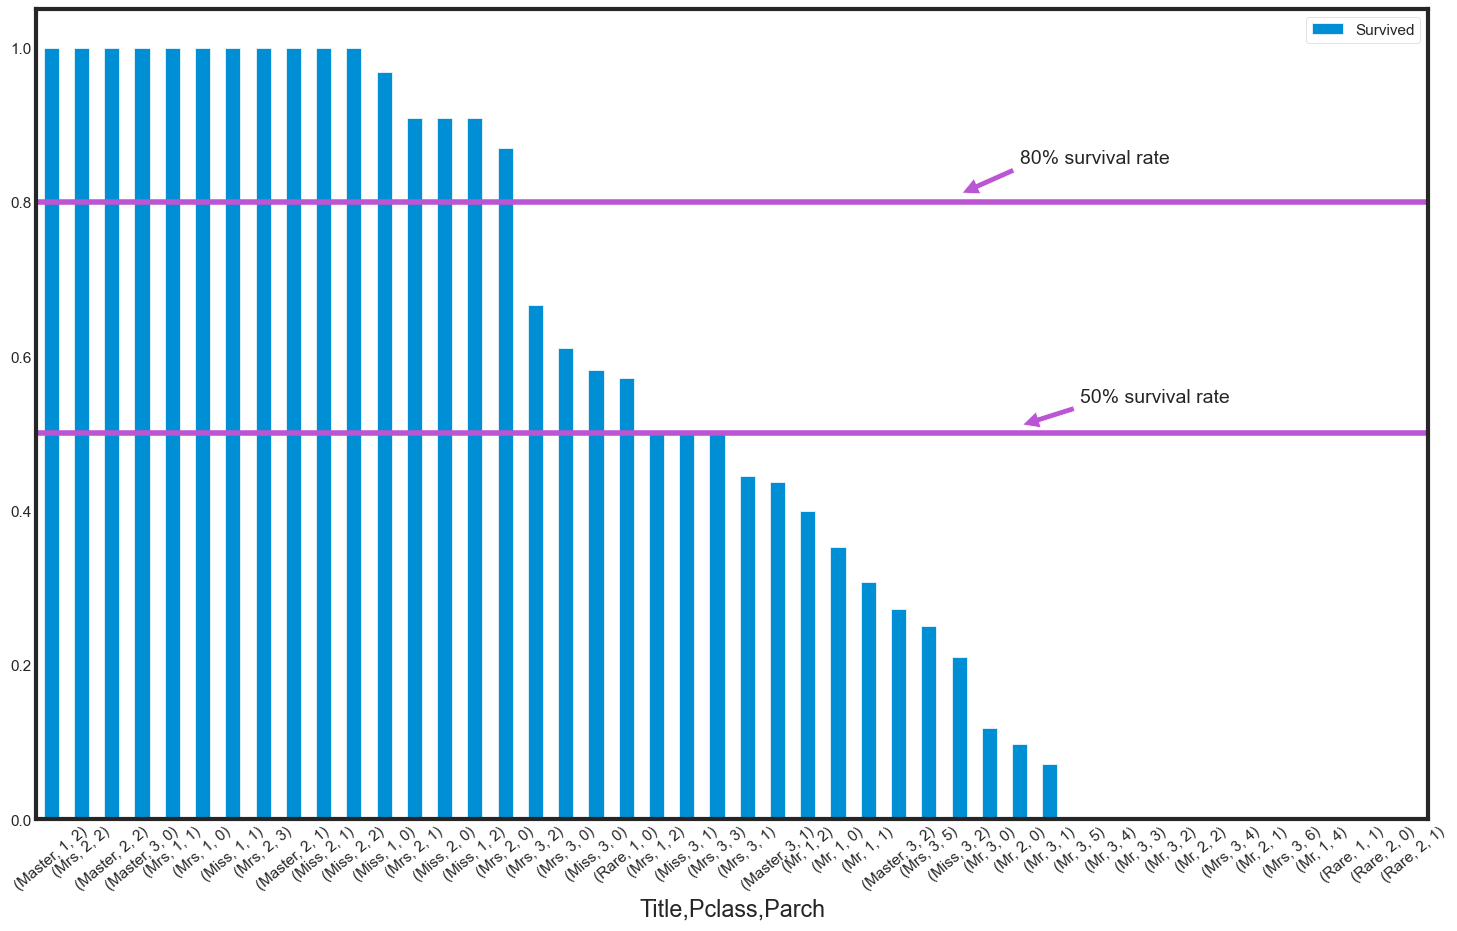

In [537]:
# based on survival rate of variables combination to build new variables...... Is it reasonable ????


TPP=ship[ship.Survived.notnull()].pivot_table(index=['Title','Pclass','Parch'],values=['Survived']).sort_values('Survived',ascending=False)

TPP.plot(kind='bar',figsize=(16,10))
plt.xticks(rotation=40)
plt.axhline(0.8,color='#BA55D3')
plt.axhline(0.5,color='#BA55D3')
plt.annotate('80% survival rate',xy=(30,0.81),xytext=(32,0.85),arrowprops=dict(facecolor='#BA55D3',shrink=0.05))
plt.annotate('50% survival rate',xy=(32,0.51),xytext=(34,0.54),arrowprops=dict(facecolor='#BA55D3',shrink=0.05))



# use 'Title','Pclass','Parch' to generate feature 'TPP'.
Tit=['Girl','Master','Mr','Miss','Mrs','Rareman','Rarewoman']
for i in Tit:
    for j in range(1,4):
        for g in range(0,10):
            if full.loc[(full.Title==i)&(full.Pclass==j)&(full.Parch==g)&(full.Survived.notnull()),'Survived'].mean()>=0.8:
                full.loc[(full.Title==i)&(full.Pclass==j)&(full.Parch==g),'TPP']=1
            elif full.loc[(full.Title==i)&(full.Pclass==j)&(full.Parch==g)&(full.Survived.notnull()),'Survived'].mean()>=0.5:
                full.loc[(full.Title==i)&(full.Pclass==j)&(full.Parch==g),'TPP']=2
            elif full.loc[(full.Title==i)&(full.Pclass==j)&(full.Parch==g)&(full.Survived.notnull()),'Survived'].mean()>=0:
                full.loc[(full.Title==i)&(full.Pclass==j)&(full.Parch==g),'TPP']=3
            else: 
                full.loc[(full.Title==i)&(full.Pclass==j)&(full.Parch==g),'TPP']=4
                

# Variable Correlation 


## Convert variables into ordinal/categorical variables

In [ ]:
# example of using mapping categorical variable into ordinal variable (however it is not good to consider this as ordinal v.)

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)
    

for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
    
    
# replace agebands with ordinals
full.loc[full.Age<=16.136,'AgeCut']=1
full.loc[(full.Age>16.136)&(full.Age<=32.102),'AgeCut']=2
full.loc[(full.Age>32.102)&(full.Age<=48.068),'AgeCut']=3
full.loc[(full.Age>48.068)&(full.Age<=64.034),'AgeCut']=4
full.loc[full.Age>64.034,'AgeCut']=5

In [541]:
ship.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,FareBand,Age*Class,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,"(11.789, 23.157]","(-0.512, 102.466]",66.0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,"(34.526, 45.894]","(-0.512, 102.466]",38.0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,"(23.157, 34.526]","(-0.512, 102.466]",78.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,"(34.526, 45.894]","(-0.512, 102.466]",35.0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,"(34.526, 45.894]","(-0.512, 102.466]",105.0,1


In [36]:
# make a copy then drop


ship_data = ship.copy().drop(['PassengerId','Name','Ticket','Cabin'],axis=1)


In [37]:
ship_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age*Class,FamilySize
0,0,3,male,22.0,1,0,7.2500,S,Mr,66.0,2
1,1,1,female,38.0,1,0,71.2833,C,Mrs,38.0,2
2,1,3,female,26.0,0,0,7.9250,S,Miss,78.0,1
3,1,1,female,35.0,1,0,53.1000,S,Mrs,35.0,2
4,0,3,male,35.0,0,0,8.0500,S,Mr,105.0,1


In [544]:
ship_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Title         0
AgeBand       0
FareBand      0
Age*Class     0
FamilySize    0
dtype: int64

In [545]:
# Create Ordinal variables

ship_data['Sex'] = ship_data['Sex'].map({'male':0, 'female':1}).astype(int)


In [549]:
ship_data['AgeBand'].value_counts()

(23.157, 34.526]    338
(11.789, 23.157]    220
(34.526, 45.894]    164
(0.34, 11.789]       68
(45.894, 57.263]     68
(57.263, 68.631]     26
(68.631, 80.0]        7
Name: AgeBand, dtype: int64

In [570]:
ship_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age*Class,FamilySize,Age_Band,Fare_Band
0,0,3,0,22.0,1,0,7.2500,S,Mr,66.0,2,1.0,0.0
1,1,1,1,38.0,1,0,71.2833,C,Mrs,38.0,2,3.0,0.0
2,1,3,1,26.0,0,0,7.9250,S,Miss,78.0,1,2.0,0.0
3,1,1,1,35.0,1,0,53.1000,S,Mrs,35.0,2,3.0,0.0
4,0,3,0,35.0,0,0,8.0500,S,Mr,105.0,1,3.0,0.0


In [38]:
ship_data.loc[ ship_data['Age'] <= 11.8, 'Age_Band'] = 0
ship_data.loc[(ship_data['Age'] > 11.8) & (ship_data['Age'] <= 23.2), 'Age_Band'] = 1
ship_data.loc[(ship_data['Age'] > 23.2) & (ship_data['Age'] <= 34.6), 'Age_Band'] = 2
ship_data.loc[(ship_data['Age'] > 34.6) & (ship_data['Age'] <= 45.9), 'Age_Band'] = 3
ship_data.loc[(ship_data['Age'] > 45.9) & (ship_data['Age'] <= 57.3), 'Age_Band'] = 4
ship_data.loc[(ship_data['Age'] > 57.3) & (ship_data['Age'] <= 68.7), 'Age_Band'] = 5
ship_data.loc[(ship_data['Age'] > 68.7) & (ship_data['Age'] <= 81), 'Age_Band'] = 6

In [563]:
ship_data['FareBand'].value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: FareBand, dtype: int64

In [39]:
ship_data.loc[ ship_data['Fare'] <= 102.5, 'Fare_Band'] = 0
ship_data.loc[(ship_data['Fare'] > 102.5) & (ship_data['Fare'] <= 205), 'Fare_Band'] = 1
ship_data.loc[(ship_data['Fare'] > 205) & (ship_data['Fare'] <= 307.4), 'Fare_Band'] = 2
ship_data.loc[(ship_data['Fare'] > 307.4) & (ship_data['Fare'] <= 410), 'Fare_Band'] = 3
ship_data.loc[(ship_data['Fare'] > 410) & (ship_data['Fare'] <= 512.4), 'Fare_Band'] = 4

In [569]:
ship_data = ship_data.drop(['Band','AgeBand','FareBand'],axis=1)

In [40]:
# Convert categorical into get_dummy

ship_data = pd.get_dummies(ship_data, columns=['Embarked','Title'])


In [41]:
ship_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Age*Class,FamilySize,Age_Band,Fare_Band,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,male,22.0,1,0,7.2500,66.0,2,1.0,0.0,0,0,1,0,0,1,0,0
1,1,1,female,38.0,1,0,71.2833,38.0,2,3.0,0.0,1,0,0,0,0,0,1,0
2,1,3,female,26.0,0,0,7.9250,78.0,1,2.0,0.0,0,0,1,0,1,0,0,0
3,1,1,female,35.0,1,0,53.1000,35.0,2,3.0,0.0,0,0,1,0,0,0,1,0
4,0,3,male,35.0,0,0,8.0500,105.0,1,3.0,0.0,0,0,1,0,0,1,0,0


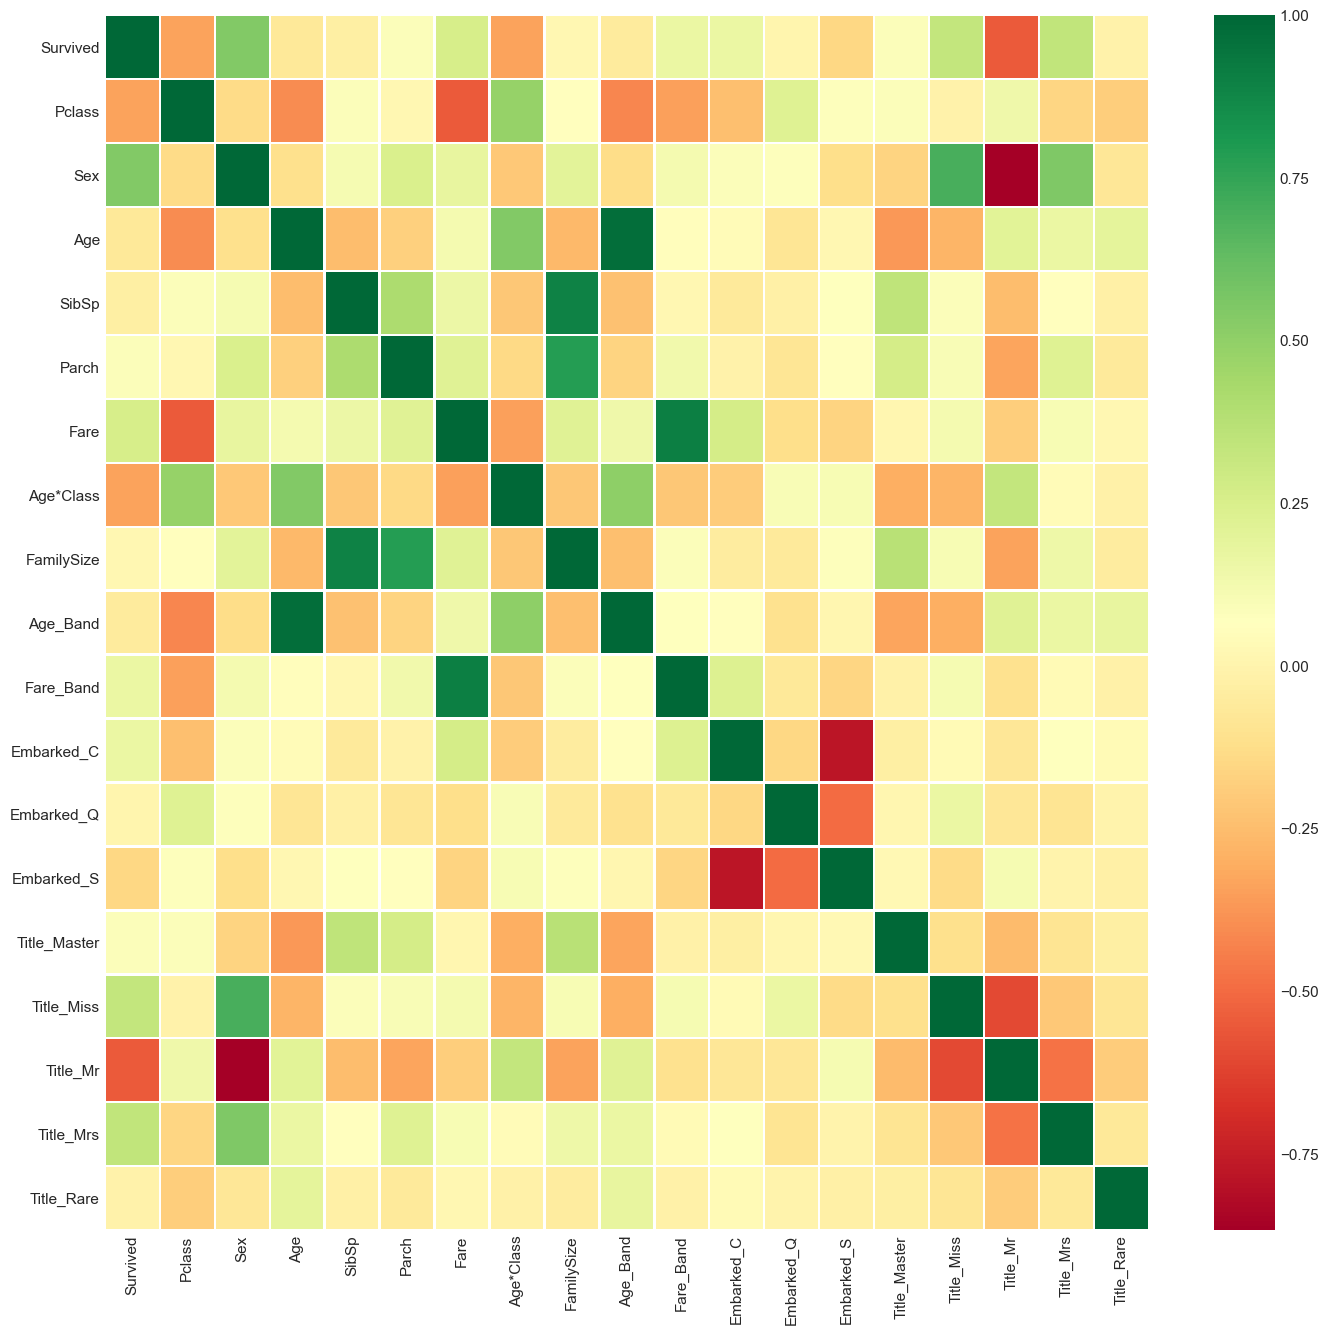

In [573]:
# Visualizing the data using heatmap
plt.figure(figsize=[15,15])
sns.heatmap(ship_data.corr(), cmap="RdYlGn",linewidth =1)
plt.show()

In [574]:
# Let's review top 5 positively and negatively correlated features.

corr_lead = ship_data.corr()
corr_lead = corr_lead.where(np.triu(np.ones(corr_lead.shape),k=1).astype(np.bool))
corr_df = corr_lead.unstack().reset_index()
corr_df.columns =['VAR1','VAR2','Correlation']
corr_df.dropna(subset = ["Correlation"], inplace = True) 
corr_df.sort_values(by='Correlation', ascending=False, inplace=True)

# Top 5 Positive correlated variables
corr_df.head(5)

<ipython-input-574-33fb5911ab48>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_lead = corr_lead.where(np.triu(np.ones(corr_lead.shape),k=1).astype(np.bool))


,VAR1,VAR2,Correlation
174,Age_Band,Age,0.971941
196,Fare_Band,Fare,0.907337
156,FamilySize,SibSp,0.890712
157,FamilySize,Parch,0.783111
287,Title_Miss,Sex,0.693916


In [575]:
corr_df.sort_values(by='Correlation', ascending=True, inplace=True)

# Top 5 Negatively correlated variables
corr_df.head(5)

,VAR1,VAR2,Correlation
306,Title_Mr,Sex,-0.867334
258,Embarked_S,Embarked_C,-0.782742
319,Title_Mr,Title_Miss,-0.601857
115,Fare,Pclass,-0.549500
304,Title_Mr,Survived,-0.549199


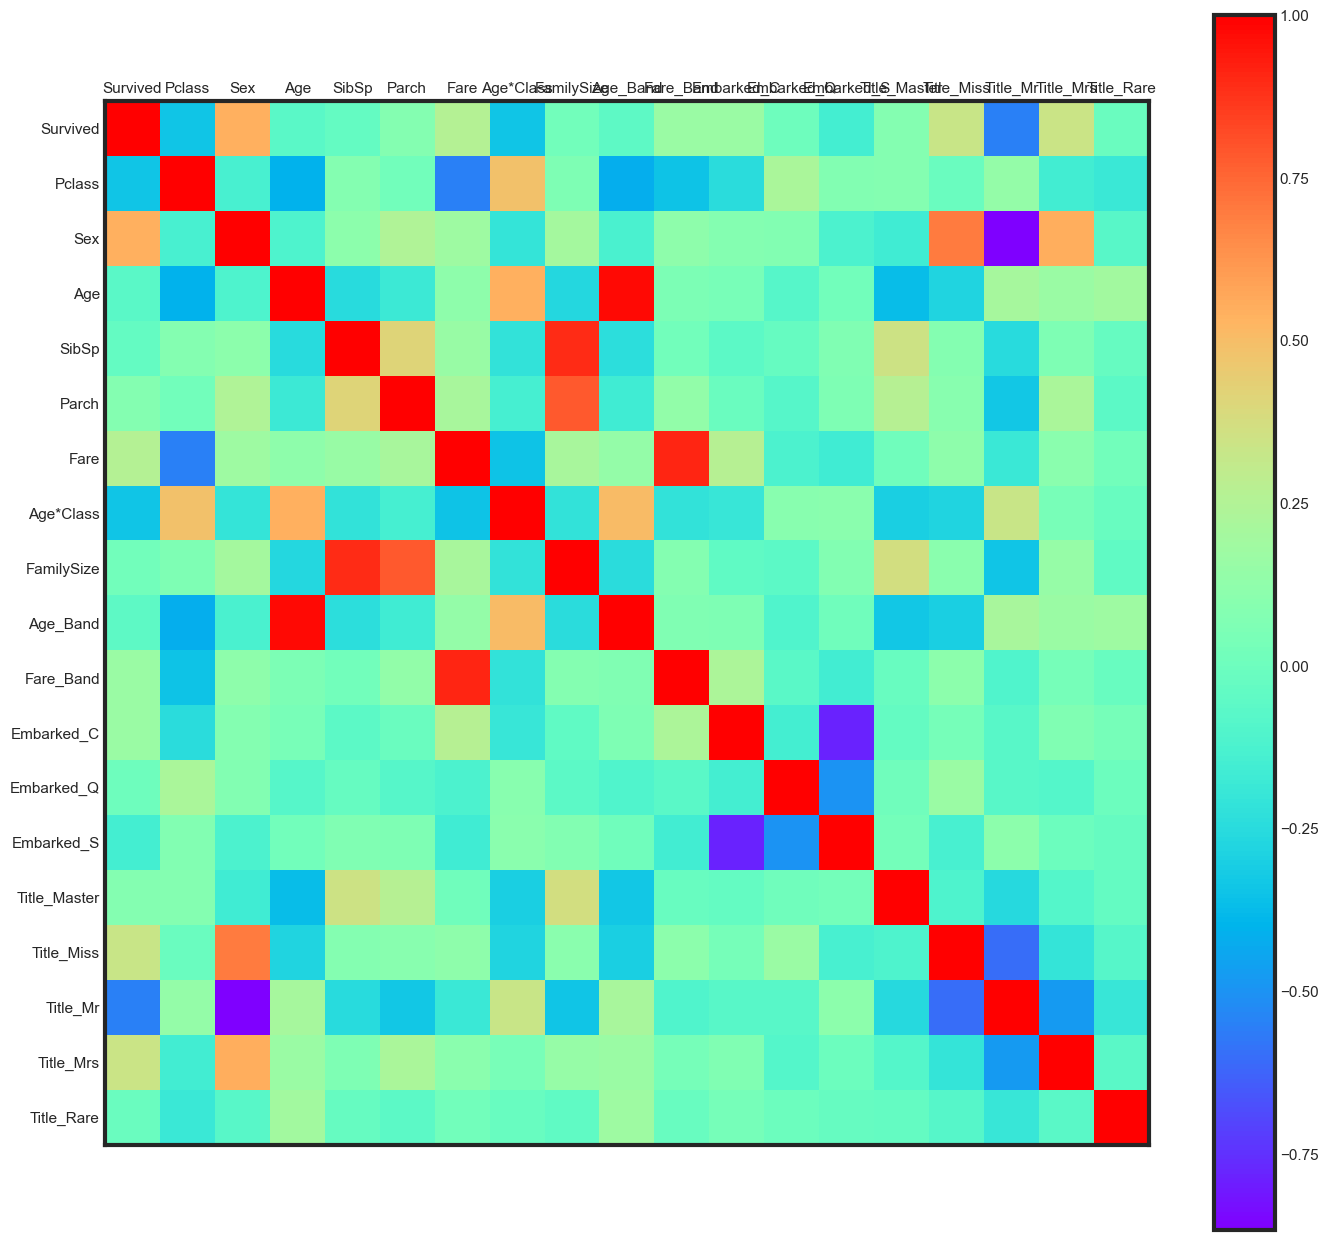

In [576]:
def plot_corr(df,size=15):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr,cmap=plt.get_cmap('rainbow'))
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.colorbar(cax)
    
    
plot_corr(ship_data)

####  Output Data

In [42]:
ship_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Age*Class,FamilySize,Age_Band,Fare_Band,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,male,22.0,1,0,7.2500,66.0,2,1.0,0.0,0,0,1,0,0,1,0,0
1,1,1,female,38.0,1,0,71.2833,38.0,2,3.0,0.0,1,0,0,0,0,0,1,0
2,1,3,female,26.0,0,0,7.9250,78.0,1,2.0,0.0,0,0,1,0,1,0,0,0
3,1,1,female,35.0,1,0,53.1000,35.0,2,3.0,0.0,0,0,1,0,0,0,1,0
4,0,3,male,35.0,0,0,8.0500,105.0,1,3.0,0.0,0,0,1,0,0,1,0,0


In [43]:
ship_data.to_csv('ship_data.csv')